In [1]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
sns.set(font="AppleGothic",
        rc={"axes.unicode_minus": False},
        style='darkgrid')

In [2]:
출상내 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 출근 (상선,내선).csv')
출하외 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 출근 (하선,외선).csv')
퇴상내 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 퇴근 (상선,내선).csv')
퇴하외 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 퇴근 (하선,외선).csv')
출상내1 = 출상내[출상내['호선명'].isin([2, 5, 6, 7])].reset_index(drop=True)
출하외1 = 출하외[출하외['호선명'].isin([2, 3, 4, 7])].reset_index(drop=True)
퇴상내1 = 퇴상내[퇴상내['호선명'].isin([2, 3, 4, 7])].reset_index(drop=True)
퇴하외1 = 퇴하외[퇴하외['호선명'].isin([2, 5, 6, 7])].reset_index(drop=True)
출상내1 = 출상내1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
출하외1 = 출하외1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
퇴상내1 = 퇴상내1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
퇴하외1 = 퇴하외1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)

# 퇴근 하선 외선

In [3]:
selected_columns = ['안전시설지수(승강장연결,스크린도어,안전발판)', 
                         '열차내 사고',
                         '역구내 사고', 
                         '출입문관련', 
                         '승강설비관련', 
                         '발빠짐',
                         '기타',
                         '총사고발생수',
                         '반경 내 학교 수',
                         '반경 내 주요공원 수', 
                         '반경 내 대학 수',
                         '반경 아파트 수',
                         '반경 내 대학교 수',
                         '공공 자전거 시설 수',
                       '총층수']
퇴하외1 = 퇴하외1.drop(columns=selected_columns);

# '승차인원' 변수 생성
퇴하외1['승차인원'] = 퇴하외1['승차인원_1718'] + 퇴하외1['승차인원_1819'] + 퇴하외1['승차인원_1920']

# '하차인원' 변수 생성
퇴하외1['하차인원'] = 퇴하외1['하차인원_1718'] + 퇴하외1['하차인원_1819'] + 퇴하외1['하차인원_1920']

# 필요한 변수들 제거
variables_to_drop = ['승차인원_1718', '승차인원_1819', '승차인원_1920', '하차인원_1718', '하차인원_1819', '하차인원_1920',
                    '퇴근출발_EE', '퇴근출발_EH', '퇴근출발_EW', '퇴근도착_EE', '퇴근도착_EH', '퇴근도착_EW']
퇴하외1.drop(columns=variables_to_drop, inplace=True)

# 결과 확인
퇴하외1

,퇴근_하외선_배차간격,환승유입인원수,"퇴근시간 혼잡도 평균(하선,외선)",퇴근출발_HE,퇴근출발_HH,퇴근출발_HW,퇴근출발_WE,퇴근출발_WH,퇴근출발_WW,퇴근도착_HE,퇴근도착_HH,퇴근도착_HW,퇴근도착_WE,퇴근도착_WH,퇴근도착_WW,승차인원,하차인원
0,4.591304,831736.50000,51.028571,28290,4255,6819,77414,176616,25441,31901,3743,9226,53525,53178,14839,733081,411157
1,4.684685,315529.91670,46.614286,23286,6113,6125,17597,59279,5337,29350,5317,7344,19731,74491,5656,158184,255328
2,4.732143,374320.83330,36.814286,34947,4969,13926,19069,57530,8332,58633,5727,14133,56398,82202,11638,216960,352219
3,4.600000,367315.66670,47.457143,27828,4485,7197,41261,109678,11762,24652,4079,6245,33489,53051,12053,290083,171303
4,4.566964,731249.16670,48.528571,16667,6515,5802,71899,243316,13081,36146,4952,11557,41971,65567,10264,437557,381427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,5.179104,147597.83330,69.028571,22017,2030,7425,8015,28886,2705,10374,2298,3612,9568,103555,4617,34273,106726
170,5.014493,244815.25000,41.142857,14521,1989,3625,95531,229096,17762,55101,1845,11507,73371,25196,16851,221328,53595
171,5.014493,95405.08333,25.842857,32461,4720,11188,12478,48988,4936,34661,4615,8783,24630,93542,6990,48552,61873
172,5.028571,246439.00000,22.457143,17267,2070,5660,2403,7411,990,4883,2929,1200,2080,36888,1311,66452,139466


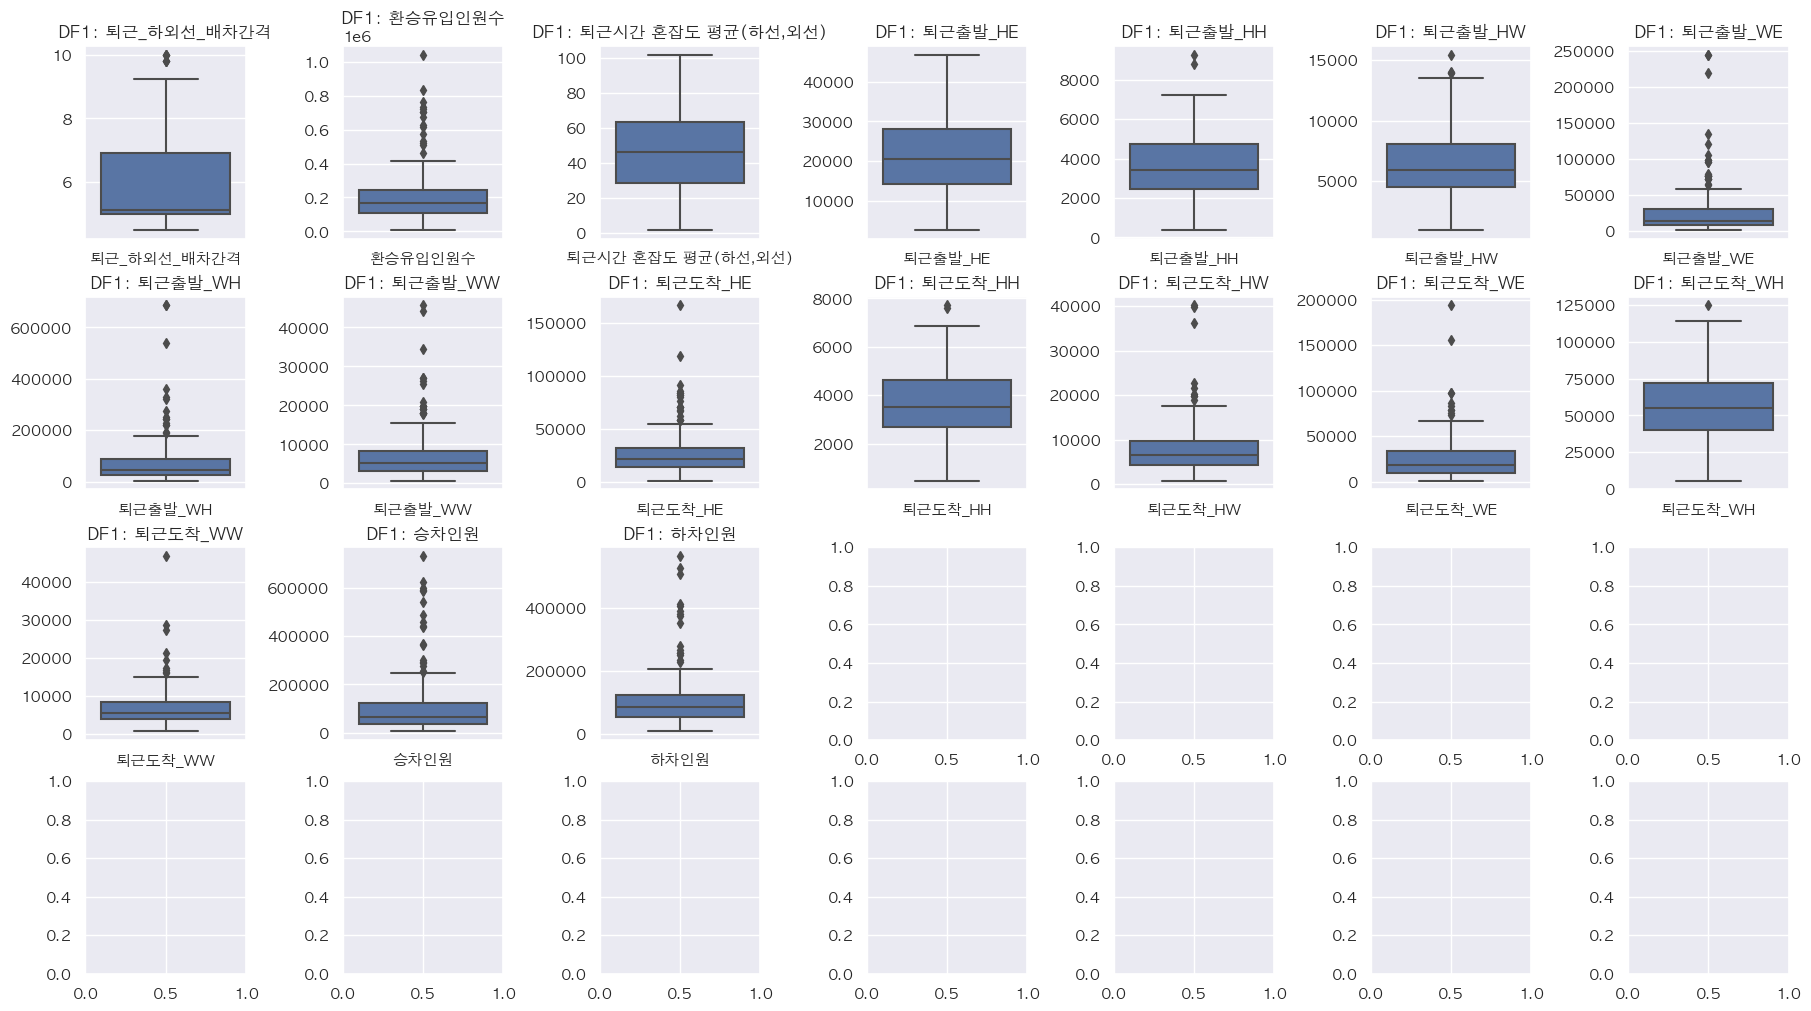

In [4]:

# 그래프를 그릴 캔버스 생성 (2개)
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()

# 각 변수에 대한 Boxplot 그리기 (첫 번째 데이터프레임)
for i, variable in enumerate(퇴하외1.columns):
    sns.boxplot(x='variable', y='value', data=pd.melt(퇴하외1[[variable]]), ax=axes[i])
    axes[i].set_title(f'DF1: {variable}')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

# 그래프 보여주기
plt.show()

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 스케일링할 변수들 선택
selected_columns = 퇴하외1.columns.difference(['퇴근시간 혼잡도 평균(하선,외선)'])
# RobustScaler 초기화
scaler = StandardScaler()

# 선택한 변수들에 대해 스케일링 수행
scaled_data = scaler.fit_transform(퇴하외1[selected_columns])
# 스케일링된 결과를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=[f"{var}_scaled" for var in selected_columns])


merged_df = pd.concat([퇴하외1, scaled_df], axis=1);
merged_df = merged_df.drop(selected_columns, axis=1)
merged_df

,"퇴근시간 혼잡도 평균(하선,외선)",승차인원_scaled,퇴근_하외선_배차간격_scaled,퇴근도착_HE_scaled,퇴근도착_HH_scaled,퇴근도착_HW_scaled,퇴근도착_WE_scaled,퇴근도착_WH_scaled,퇴근도착_WW_scaled,퇴근출발_HE_scaled,퇴근출발_HH_scaled,퇴근출발_HW_scaled,퇴근출발_WE_scaled,퇴근출발_WH_scaled,퇴근출발_WW_scaled,하차인원_scaled,환승유입인원수_scaled
0,51.028571,4.733852,-0.855313,0.185045,0.121630,0.220537,1.057489,-0.145224,1.433613,0.749883,0.340576,0.147923,1.334054,0.953220,2.502578,3.231530,3.656084
1,46.614286,0.346883,-0.790478,0.072263,1.186783,-0.088548,-0.246995,0.722092,-0.254524,0.195997,1.435239,-0.103961,-0.260899,-0.216972,-0.295619,1.574617,0.616336
2,36.814286,0.795396,-0.757527,1.366882,1.464237,1.026425,1.168390,1.035885,0.845164,1.486736,0.761238,2.727370,-0.221650,-0.234414,0.121243,2.604849,0.962534
3,47.457143,1.353388,-0.849276,-0.135438,0.349007,-0.269039,0.284078,-0.150392,0.921455,0.698744,0.476083,0.285116,0.370075,0.285653,0.598651,0.681189,0.921283
4,48.528571,2.478744,-0.872213,0.372719,0.939782,0.603363,0.611493,0.358937,0.592578,-0.536651,1.672082,-0.221192,1.187002,1.618414,0.782238,2.915414,3.064352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,69.028571,-0.598667,-0.447194,-0.766677,-0.856226,-0.701462,-0.639298,1.904829,-0.445526,0.055533,-0.970309,0.367867,-0.516392,-0.520079,-0.661957,-0.005451,-0.372554
170,41.142857,0.828727,-0.561487,1.210730,-1.162779,0.595151,1.823566,-1.283930,1.803484,-0.774188,-0.994464,-1.011322,1.817123,1.476599,1.433768,-0.570387,0.199923
171,25.842857,-0.489705,-0.561487,0.307066,0.711728,0.147783,-0.057889,1.497358,-0.009291,1.211564,0.614536,1.733628,-0.397391,-0.319603,-0.351433,-0.482368,-0.679897
172,22.457143,-0.353113,-0.551712,-1.009437,-0.429218,-1.097590,-0.928343,-0.808133,-1.053277,-0.470237,-0.946742,-0.272730,-0.666030,-0.734247,-0.900661,0.342669,0.209485


## PCA

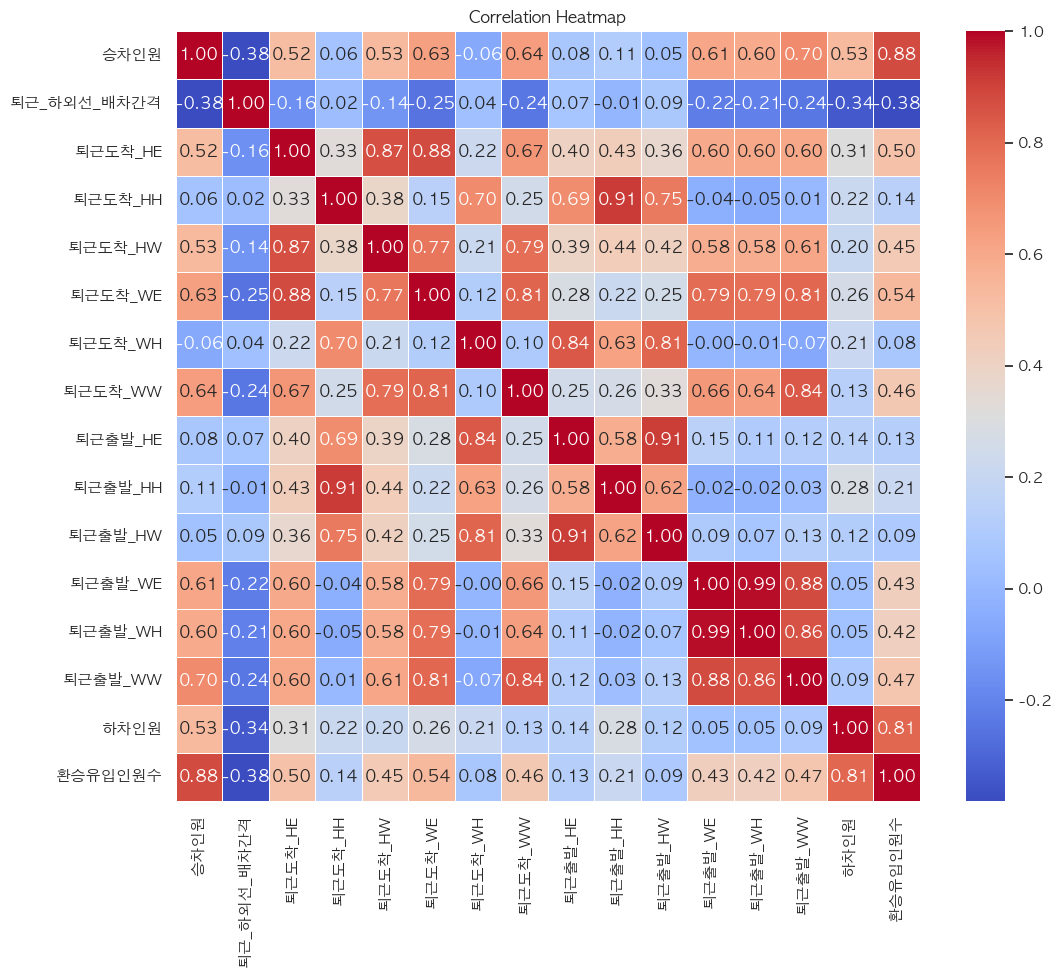

In [6]:
# 히트맵 데이터 추출
heatmap_data = 퇴하외1[selected_columns]

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# 데이터 분할
target = merged_df['퇴근시간 혼잡도 평균(하선,외선)']
data = merged_df.drop('퇴근시간 혼잡도 평균(하선,외선)', axis=1)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)
퇴하외pca = pca.transform(data)
print(퇴하외pca.shape)

(174, 3)


In [9]:
print(pca.explained_variance_ratio_)

[0.43839474 0.24139984 0.1163569 ]


In [10]:
# 주성분 벡터 출력
components_df = pd.DataFrame(pca.components_, columns=data.columns)
print("주성분 벡터:")
components_df

주성분 벡터:


,승차인원_scaled,퇴근_하외선_배차간격_scaled,퇴근도착_HE_scaled,퇴근도착_HH_scaled,퇴근도착_HW_scaled,퇴근도착_WE_scaled,퇴근도착_WH_scaled,퇴근도착_WW_scaled,퇴근출발_HE_scaled,퇴근출발_HH_scaled,퇴근출발_HW_scaled,퇴근출발_WE_scaled,퇴근출발_WH_scaled,퇴근출발_WW_scaled,하차인원_scaled,환승유입인원수_scaled
0,0.285016,-0.113499,0.324445,0.150873,0.321146,0.340769,0.119351,0.320298,0.178151,0.164360,0.174600,0.293477,0.288893,0.307424,0.149293,0.257176
1,0.176085,-0.123957,-0.018612,-0.415896,-0.031386,0.105914,-0.418541,0.073415,-0.384971,-0.372239,-0.398053,0.209789,0.214580,0.206654,-0.039464,0.089521
2,0.279253,-0.338173,-0.058281,0.044591,-0.109743,-0.103289,-0.006706,-0.130145,-0.102743,0.093708,-0.119791,-0.222429,-0.220643,-0.173458,0.613950,0.472979


In [11]:
# 주성분의 고유값 출력
explained_variance_df = pd.DataFrame(pca.explained_variance_, columns=['Explained Variance'])
print("\n주성분의 고유값:")
explained_variance_df


주성분의 고유값:


,Explained Variance
0,7.054861
1,3.884723
2,1.872472


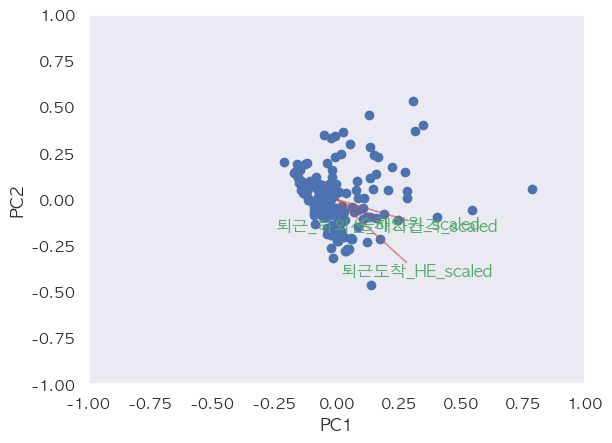

In [12]:
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()
biplot(퇴하외pca, pca.components_, 1, 2, labels=components_df.columns)